<a href="https://colab.research.google.com/github/amandaocalvo/furry-waddle/blob/main/Corrida_De_Taxi_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Determinando o valor da corrida de táxi em NY com Regressão Linear

In [ ]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

Explorando os dados

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.shape


(1000000, 8)

In [ ]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [ ]:
# removendo valores faltantes

print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df.dropna(inplace=True)
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 1000000
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999990


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,999990,999990,2009-06-15 17:26:21.0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,999990.0,NaN,NaN,NaN,11.347953,9.82179,-44.9,6.0,8.5,12.5,500.0
pickup_datetime,999990,861747,2010-02-13 19:28:00 UTC,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,999990.0,NaN,NaN,NaN,-72.526699,12.057778,-3377.680935,-73.99206,-73.981792,-73.967094,2522.271325
pickup_latitude,999990.0,NaN,NaN,NaN,39.92904,7.626087,-3116.285383,40.734965,40.752695,40.767154,2621.62843
dropoff_longitude,999990.0,NaN,NaN,NaN,-72.52786,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,NaN,NaN,NaN,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,999990.0,NaN,NaN,NaN,1.684941,1.323907,0.0,1.0,1.0,2.0,208.0


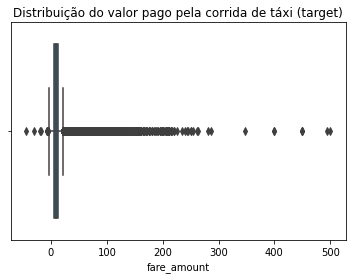

In [ ]:
# plotando boxplot

sns.boxplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target)");

In [ ]:
# ver corridas que custaram menos de 1 dólar
len(df.loc[(df.fare_amount < 1)])

75

In [ ]:
# ver corridas que custaram mais de 100 dólares
len(df.loc[(df.fare_amount > 100)])

396

In [ ]:
# removendo outliers
df = df.loc[(df.fare_amount >= 1) & (df.fare_amount <= 100)]

Text(0.5, 1.0, 'Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos')

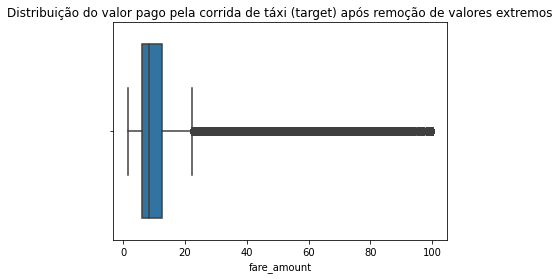

In [ ]:
sns.boxplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos")

Text(0.5, 1.0, 'Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos')

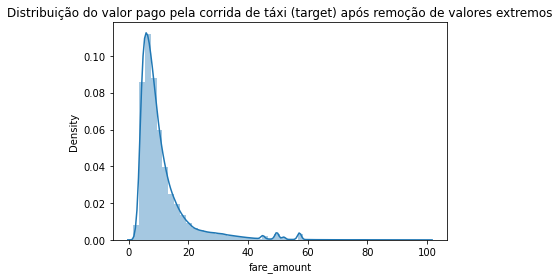

In [ ]:
sns.distplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos")

In [ ]:
# removendo outliers
df = df.loc[(df.fare_amount >= 1) & (df.fare_amount <= 30)]

In [ ]:
# transformando variável de data e hora

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948937 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                948937 non-null  object        
 1   fare_amount        948937 non-null  float64       
 2   pickup_datetime    948937 non-null  datetime64[ns]
 3   pickup_longitude   948937 non-null  float64       
 4   pickup_latitude    948937 non-null  float64       
 5   dropoff_longitude  948937 non-null  float64       
 6   dropoff_latitude   948937 non-null  float64       
 7   passenger_count    948937 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 65.2+ MB


Text(0.5, 1.0, 'Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos')

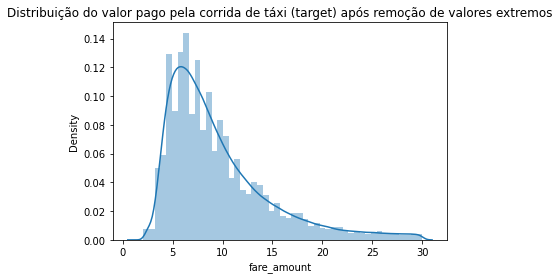

In [ ]:
sns.distplot(df.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos")

In [ ]:
# horário
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
# dia da semana (0 é segunda e 6 é domingo)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:x.weekday())
# dia
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
# mês
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)
# ano
df['pickup_year']=df['pickup_datetime'].apply(lambda x:x.year)

In [ ]:
df.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,2010


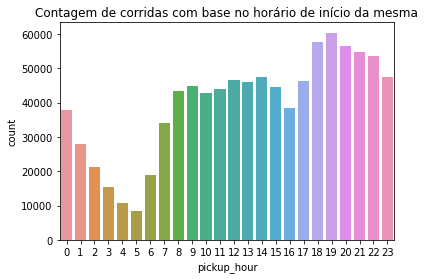

In [ ]:
sns.countplot(df['pickup_hour']).set_title("Contagem de corridas com base no horário de início da mesma");

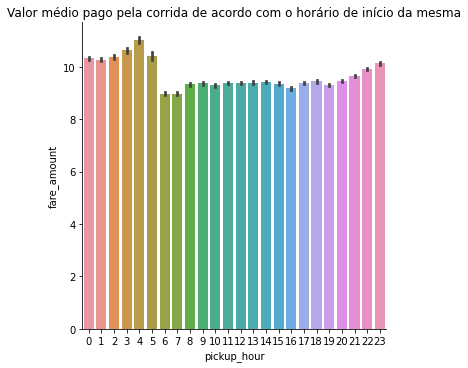

In [ ]:
sns.catplot(x="pickup_hour", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o horário de início da mesma")

In [ ]:
# fazendo a conversão dos dias da semana para facilitar a leitura
def convert_day_of_week(day_of_week):
    day_dict={0:'Segunda',1:'Terça',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sábado',6:'Domingo'}
    return day_dict[day_of_week]

In [ ]:
df['pickup_day_of_week_name']=df['pickup_day_of_week'].apply(lambda x:convert_day_of_week(x))

In [ ]:
week_day_name = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

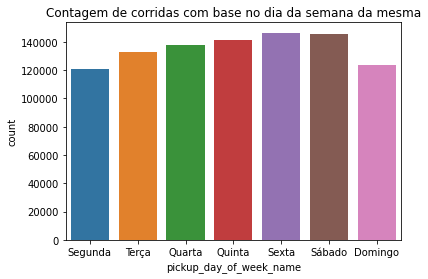

In [ ]:
sns.countplot(df['pickup_day_of_week_name'],order=week_day_name).set_title("Contagem de corridas com base no dia da semana da mesma");

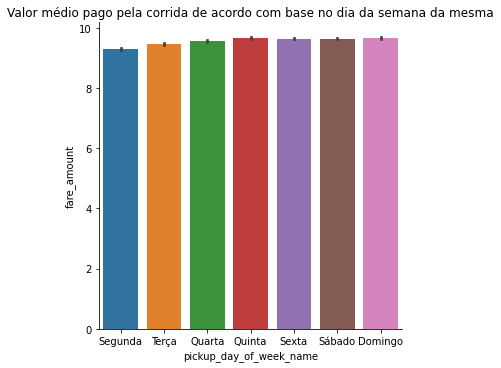

In [ ]:
sns.catplot(x="pickup_day_of_week_name", y="fare_amount", data=df,
            order=week_day_name,kind="bar").set(title="Valor médio pago pela corrida de acordo com base no dia da semana da mesma");

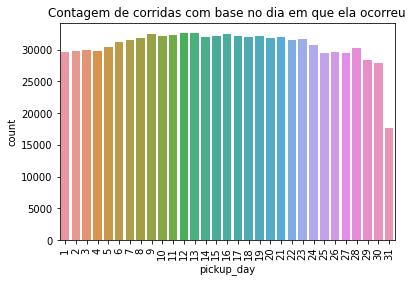

In [ ]:
sns.countplot(df['pickup_day']).set_title("Contagem de corridas com base no dia em que ela ocorreu");
plt.xticks(rotation=90);

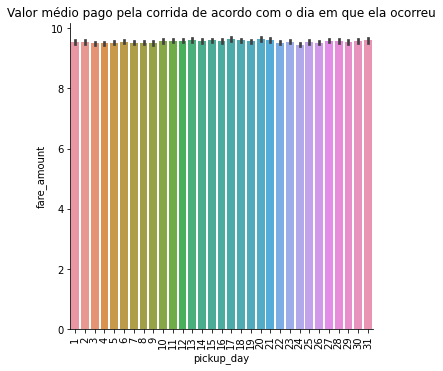

In [ ]:
sns.catplot(x="pickup_day", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o dia em que ela ocorreu");
plt.xticks(rotation=90);

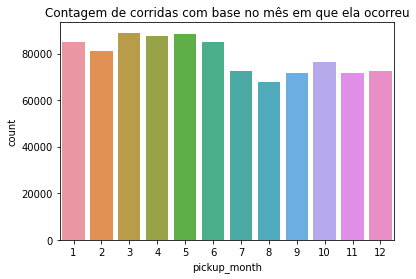

In [ ]:
sns.countplot(df['pickup_month']).set_title("Contagem de corridas com base no mês em que ela ocorreu");

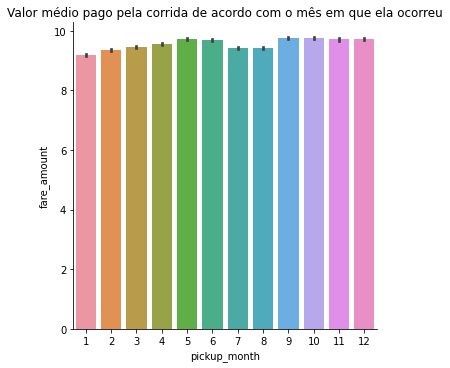

In [ ]:
sns.catplot(x="pickup_month", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o mês em que ela ocorreu")

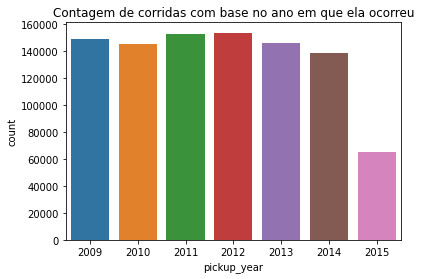

In [ ]:
sns.countplot(df['pickup_year']).set_title("Contagem de corridas com base no ano em que ela ocorreu");

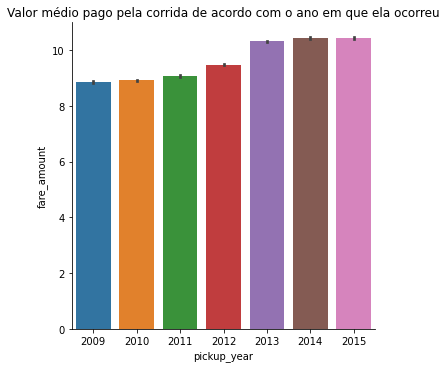

In [ ]:
sns.catplot(x="pickup_year", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com o ano em que ela ocorreu")

In [ ]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,948937.000000,948937.000000,948937.000000,948937.000000
mean,39.938610,-72.545181,39.931270,-72.549644
std,7.676761,12.076762,8.263208,11.290140
min,-3116.285383,-3377.680935,-3114.338567,-3383.296608
25%,40.735761,-73.992304,40.734953,-73.991539
50%,40.752768,-73.982114,40.753325,-73.980565
75%,40.766900,-73.968460,40.767995,-73.965321
max,2621.628430,2522.271325,1651.553433,40.851027


In [ ]:
# removendo valores absurdos

print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=-90) & (df.pickup_latitude<=90)]
df = df.loc[(df.pickup_longitude>=-180) & (df.pickup_longitude<=180)]
df = df.loc[(df.dropoff_latitude>=-90) & (df.dropoff_latitude<=90)]
df = df.loc[(df.dropoff_longitude>=-180) & (df.dropoff_longitude<=180)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 948937
Tamanho conjunto de dados (depois da remoção de valores faltantes): 948900


In [ ]:
df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,948900.000000,948900.000000,948900.000000,948900.000000
mean,39.936194,-72.535983,39.937844,-72.536953
std,6.059870,10.341114,6.055721,10.330272
min,-74.016587,-128.175950,-74.016627,-121.391248
25%,40.735762,-73.992303,40.734953,-73.991539
50%,40.752768,-73.982113,40.753325,-73.980564
75%,40.766900,-73.968459,40.767994,-73.965321
max,69.400000,40.812887,81.510177,40.851027


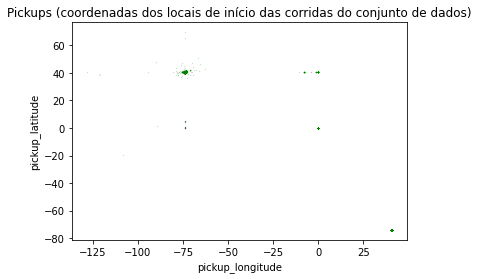

In [ ]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Pickups (coordenadas dos locais de início das corridas do conjunto de dados)");

In [ ]:
# limitando longitude e latitude

long_interval = (-74.04, -73.75)
lat_interval = (40.63, 40.88)

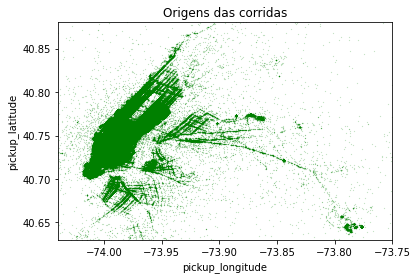

In [ ]:
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Origens das corridas")
plt.ylim(lat_interval)
plt.xlim(long_interval);

In [ ]:
# limitando longitude e latitude no conjunto de dados

print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(df)}')
df = df.loc[(df.pickup_latitude>=40.63) & (df.pickup_latitude<=40.88)]
df = df.loc[(df.pickup_longitude>=-74.04) & (df.pickup_longitude<=-73.75)]
df = df.loc[(df.dropoff_latitude>=40.63) & (df.dropoff_latitude<=40.88)]
df = df.loc[(df.dropoff_longitude>=-74.04) & (df.dropoff_longitude<=-73.75)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(df)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 948900
Tamanho conjunto de dados (depois da remoção de valores faltantes): 926431


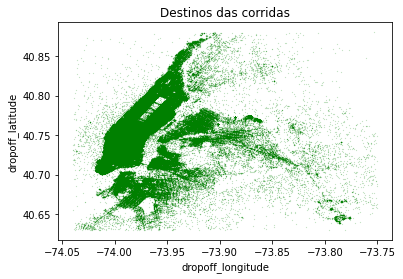

In [ ]:
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Destinos das corridas");

In [ ]:
# calculando a distância entre os pontos com pitágoras

df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
df['abs_distancia'] = (  ((df.dropoff_latitude-df.pickup_latitude)**2 + (df.dropoff_longitude-df.pickup_longitude)**2)**(1/2)  ).abs()

# xa=pickup lat ya=pickup long
# xb=drop off lat yb=drop off long

In [ ]:
df[['abs_diff_latitude', 'abs_diff_longitude', 'abs_distancia']].describe()

,abs_diff_latitude,abs_diff_longitude,abs_distancia
count,926431.000000,926431.000000,926431.000000
mean,0.018776,0.016966,0.027512
std,0.017275,0.018203,0.022654
min,0.000000,0.000000,0.000000
25%,0.006751,0.005899,0.012503
50%,0.013621,0.012038,0.020810
75%,0.025480,0.021754,0.035054
max,0.233234,0.238857,0.258918


In [ ]:
len(df.loc[df.passenger_count<1])

3435

In [ ]:
len(df.loc[df.passenger_count>4])

84722

In [ ]:
df = df.loc[(df.passenger_count > 0) & (df.passenger_count<5)]

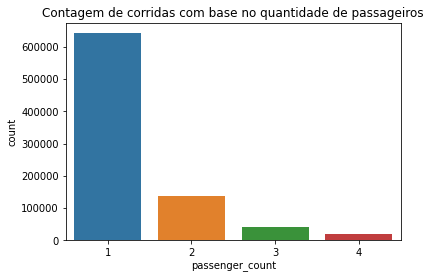

In [ ]:
sns.countplot(df['passenger_count']).set_title("Contagem de corridas com base no quantidade de passageiros");

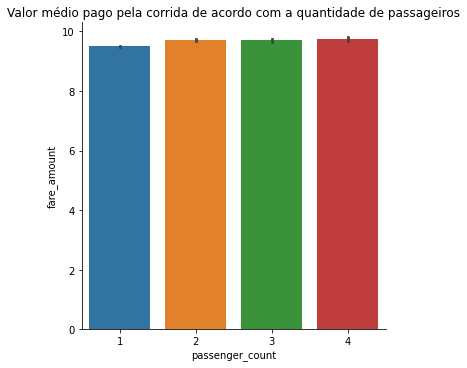

In [ ]:
sns.catplot(x="passenger_count", y="fare_amount", data=df,kind="bar").set(title="Valor médio pago pela corrida de acordo com a quantidade de passageiros");

Correlação

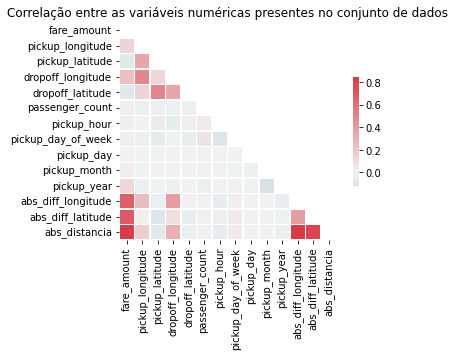

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlação entre as variáveis numéricas presentes no conjunto de dados");

In [ ]:
from sklearn.linear_model import LinearRegression

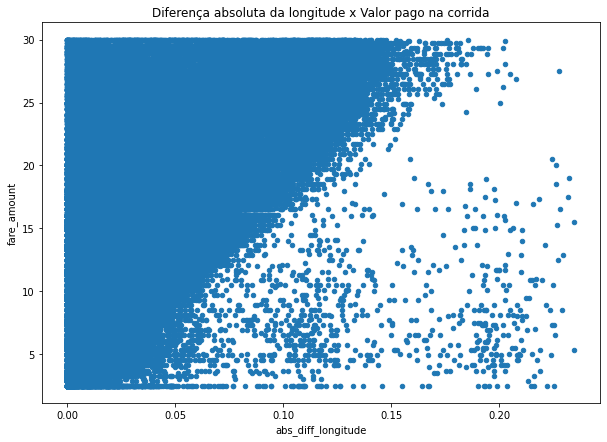

In [ ]:
# Variável target x variável com a diferença absoluta entre as longitudes de origem e destino
_ = df.plot.scatter(x='abs_diff_longitude', y='fare_amount', figsize=(10, 7))
_ = plt.title('Diferença absoluta da longitude x Valor pago na corrida')

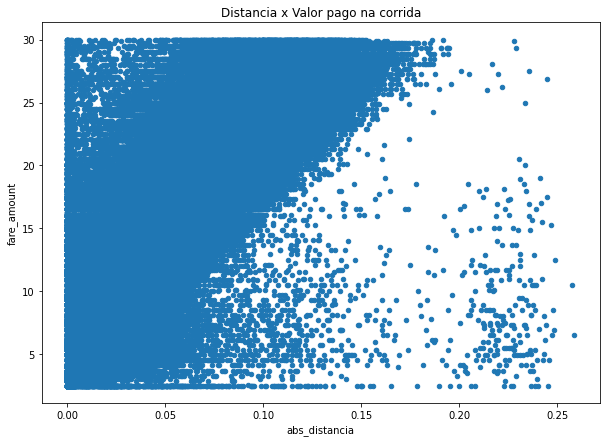

In [ ]:
# Variável target x variável com a distância
_ = df.plot.scatter(x='abs_distancia', y='fare_amount', figsize=(10, 7))
_ = plt.title('Distancia x Valor pago na corrida')

In [ ]:
df.fare_amount.corr(df.abs_diff_longitude)


0.6705829992603954

In [ ]:
df.fare_amount.corr(df.abs_distancia)

0.8413731751750214

Separação do conjunto de dados

In [ ]:
Y = df['fare_amount']
del df['fare_amount']
X = df

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [ ]:
print(X_train.shape)
X_train.head(1)

(586791, 16)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude,abs_distancia
127053,2009-03-13 08:48:00.00000084,2009-03-13 08:48:00,-73.978655,40.748647,-73.992257,40.746047,2,8,4,13,3,2009,Sexta,0.013602,0.0026,0.013848


In [ ]:
print(Y_train.shape)
Y_train.head(1)

(586791,)


127053    6.5
Name: fare_amount, dtype: float64

In [ ]:
print(X_test.shape)
X_test.head(1)

(251483, 16)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude,abs_distancia
901977,2009-03-14 00:05:00.000000263,2009-03-14 00:05:00,-73.98245,40.740502,-74.003905,40.73656,1,0,5,14,3,2009,Sábado,0.021455,0.003942,0.021814


In [ ]:
print(Y_test.shape)
Y_test.head(1)

(251483,)


901977    7.3
Name: fare_amount, dtype: float64

Treinamento do modelo

In [ ]:
# instancia a regressão linear
lm = LinearRegression()
# como vou utilizar somente uma feature, passar somente ela para treinar o modelo
lm.fit(X_train[['abs_distancia']], Y_train)

LinearRegression()

Predição

In [ ]:
# para fazer a predição também só deve-se utilizar a feature fornecida no treinamento
Y_pred = lm.predict(X_test[['abs_distancia']])

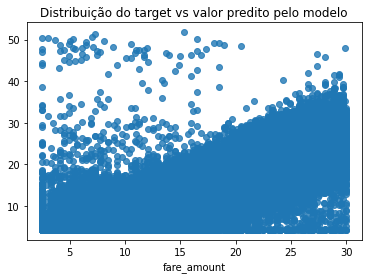

In [ ]:
_ = sns.regplot(x=Y_test, y=Y_pred).set_title("Distribuição do target vs valor predito pelo modelo")

In [ ]:
# pegando de exemplo o caso em que a diferença das longitudes é de 0.1067120000000017
example = X_test[['abs_distancia']].iloc[0][0]
example

0.021814132781299147

In [ ]:
# pegando os coeficientes que compõem a equação da regressão linear
beta=lm.coef_
intercept=lm.intercept_
print(beta)
print(intercept)

[192.08572487]
4.262602174027457


In [ ]:
# Y = (225.37880345 * example) + 6.081784576615056
(beta[0] * example) + intercept

8.452785681842794

In [ ]:
Y_pred[0]

8.452785681842794

In [ ]:
(beta * 0.022119) + intercept

array([8.51134632])

Calculando as métricas

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
mse

7.6881226333530535

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

1.8733683626051165

In [ ]:
r2_score(Y_test, Y_pred)

0.711695899998392

Treinando o modelo com múltiplas variáveis

In [ ]:
columns = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_distancia']

In [ ]:
lm.fit(X_train[columns], Y_train)

LinearRegression()

In [ ]:
Y_pred = lm.predict(X_test[columns])

In [ ]:
beta=lm.coef_
intercept=lm.intercept_

In [ ]:
beta.tolist()

[-2.2904315948615537,
 5.335027123810949,
 -0.6005348257670811,
 -12.973491214011505,
 0.09513708207560434,
 0.013140143766490198,
 -0.027649709179330628,
 0.001823903166860319,
 0.056208935524711984,
 0.41206401812192794,
 193.6952721725594]

In [ ]:
intercept

-727.9189790677152

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

1.7566549525836206

In [ ]:
r2_score(Y_test, Y_pred)

0.7379685577273989

In [ ]:
weights = pd.DataFrame(list(zip(columns, lm.coef_.tolist())),columns=['names', 'coefs'])
weights

,names,coefs
0,pickup_longitude,-2.290432
1,pickup_latitude,5.335027
2,dropoff_longitude,-0.600535
3,dropoff_latitude,-12.973491
4,passenger_count,0.095137
5,pickup_hour,0.013140
6,pickup_day_of_week,-0.027650
7,pickup_day,0.001824
8,pickup_month,0.056209
9,pickup_year,0.412064


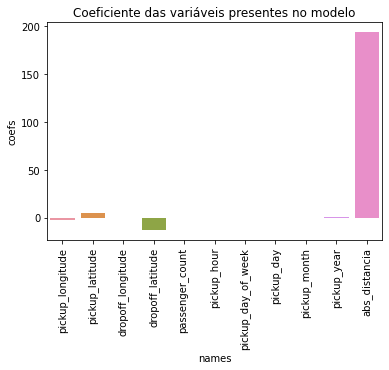

In [ ]:
sns.barplot(weights.names, weights.coefs).set_title("Coeficiente das variáveis presentes no modelo");
plt.xticks(rotation=90);

In [ ]:
lm.fit(X_train[['pickup_year','abs_distancia']], Y_train)

LinearRegression()

In [ ]:
Y_pred = lm.predict(X_test[['pickup_year','abs_distancia']])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

1.782096940572213

In [ ]:
r2_score(Y_test, Y_pred)

0.7322558365771914